In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config Completer.use_jedi = False
%matplotlib inline

In [3]:
data = pd.read_csv('./data/train_u6lujuX_CVtuZ9i (1).csv')
test = test = pd.read_csv('./data/test_lAUu6dG.csv')

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
print('Number of rows in training data -->', len(data))
print('Number of rows in test data -->', len(test))

Number of rows in training data --> 614
Number of rows in test data --> 367


In [8]:
print('Distribution of events for the target variable -->')
data['Loan_Status'].value_counts()

Distribution of events for the target variable -->


Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot: >

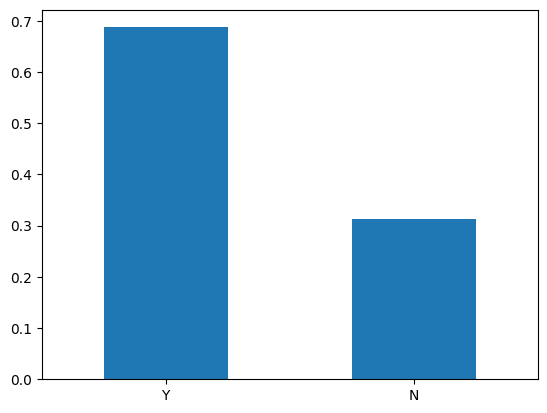

In [9]:
data['Loan_Status'].value_counts(normalize=True).plot(kind='bar', rot='horizontal')

***Observations*** \
We can observe that around 69% of the applicants (422 out of 614) were approved for loan.

# EDA

## Univariate Analysis

In [10]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Categorical Variables

<AxesSubplot: >

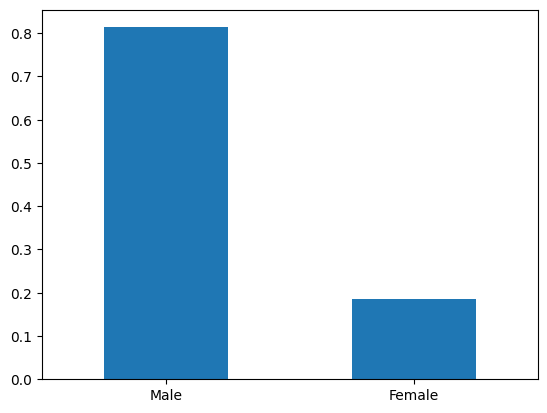

In [11]:
data['Gender'].value_counts(normalize=True).plot(kind='bar', rot='horizontal')

<AxesSubplot: >

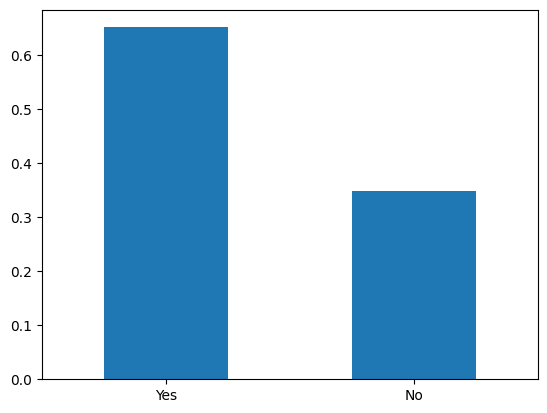

In [12]:
data['Married'].value_counts(normalize=True).plot(kind='bar', rot='horizontal')

<AxesSubplot: >

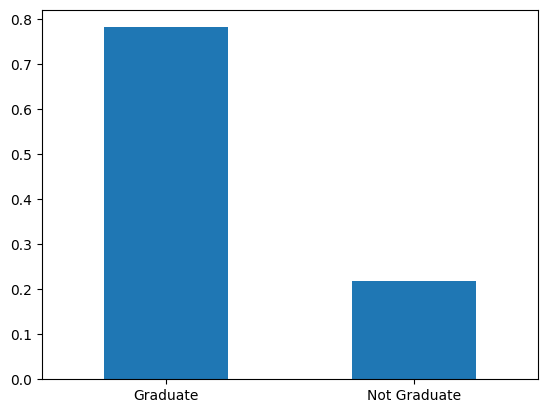

In [13]:
data['Education'].value_counts(normalize=True).plot(kind='bar', rot='horizontal')

<AxesSubplot: >

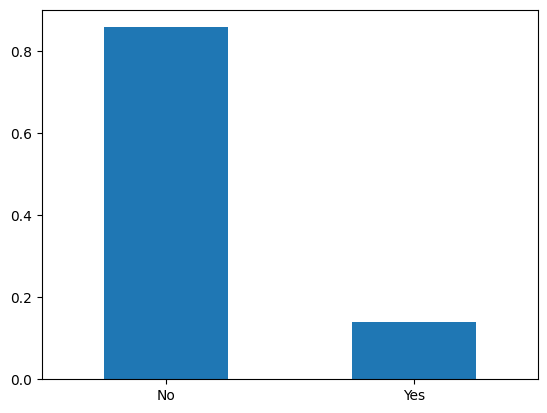

In [14]:
data['Self_Employed'].value_counts(normalize=True).plot(kind='bar', rot='horizontal')

<AxesSubplot: >

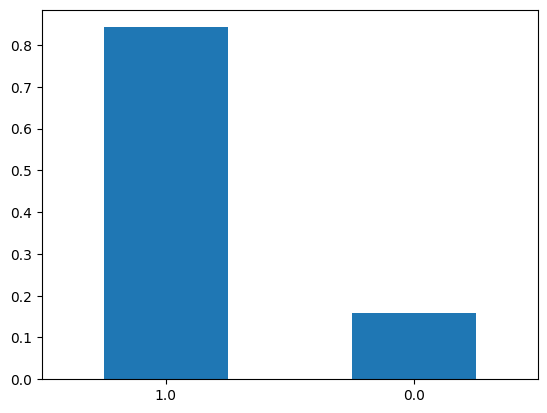

In [15]:
data['Credit_History'].value_counts(normalize=True).plot(kind='bar', rot='horizontal')

***Observations*** \
From the above plots we understand that:
* 80% of the applicants are male
* Around 65% of the applicants are married
* Around 75% of the applicants are graduates
* Around 18% of the applicants are self-employed
* More than 80% of the applicants have a credit history

### Ordinal Variables

<AxesSubplot: >

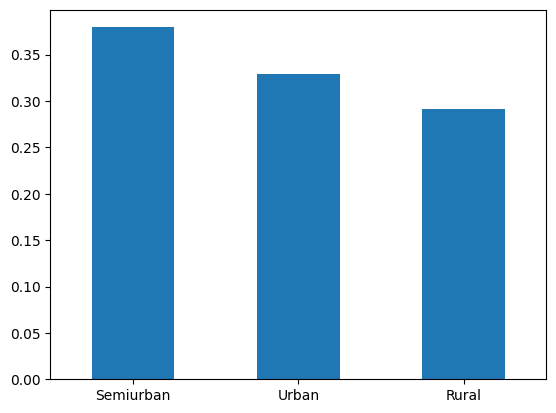

In [16]:
data['Property_Area'].value_counts(normalize=True).plot(kind='bar', rot='horizontal')

<AxesSubplot: >

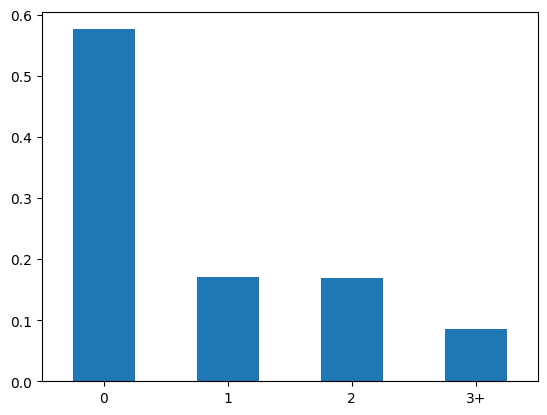

In [17]:
data['Dependents'].value_counts(normalize=True).plot(kind='bar', rot='horizontal')

***Observations*** \
From the above plots we observe the following:
* There is almost an equal distribution of people in different property areas
* Around 58% of the applicants have no dependents

### Numerical Variables

In [18]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Plotting the distribution of the numerical variables**

In [19]:
def plot_dist_and_box(var):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    axs[0].hist(data[var], histtype='bar')
    axs[0].set_title('Distribution Plot')
    axs[1].set_title('Box Plot')
    data[var].plot.box()
    plt.show()

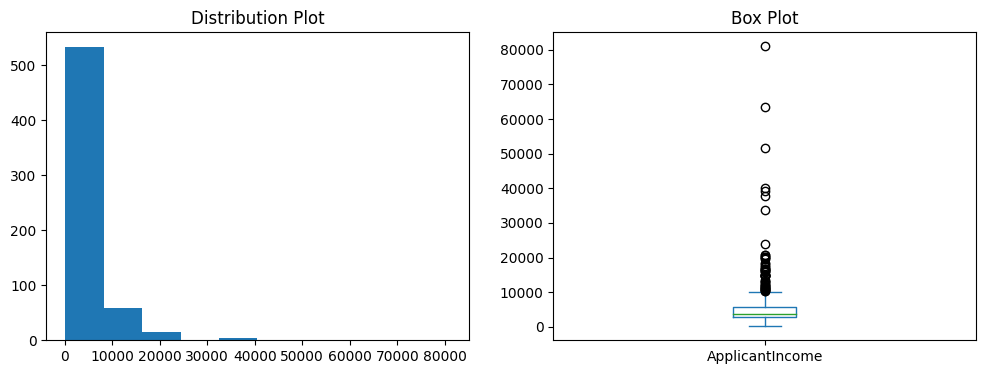

In [20]:
plot_dist_and_box('ApplicantIncome')

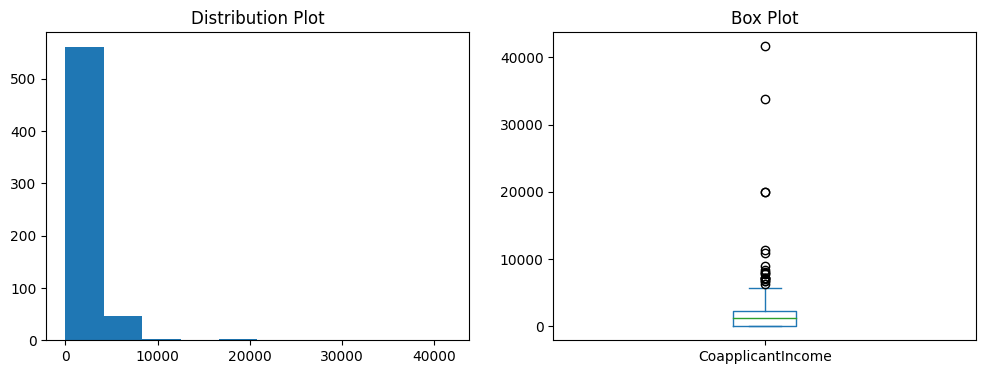

In [21]:
plot_dist_and_box('CoapplicantIncome')

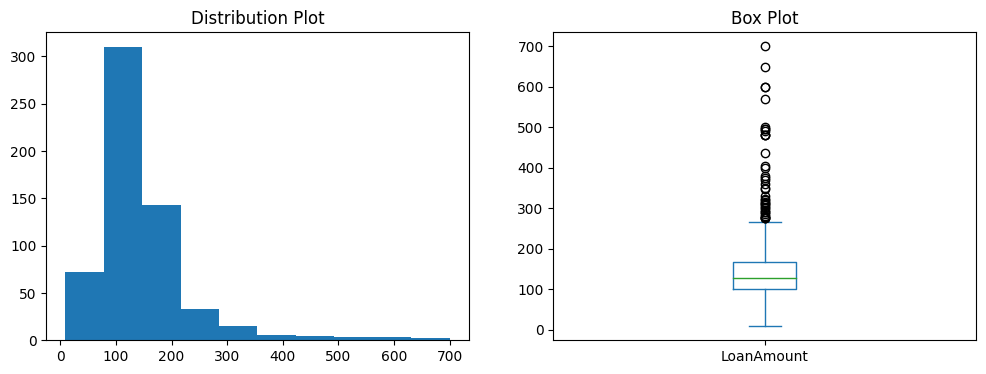

In [22]:
plot_dist_and_box('LoanAmount')

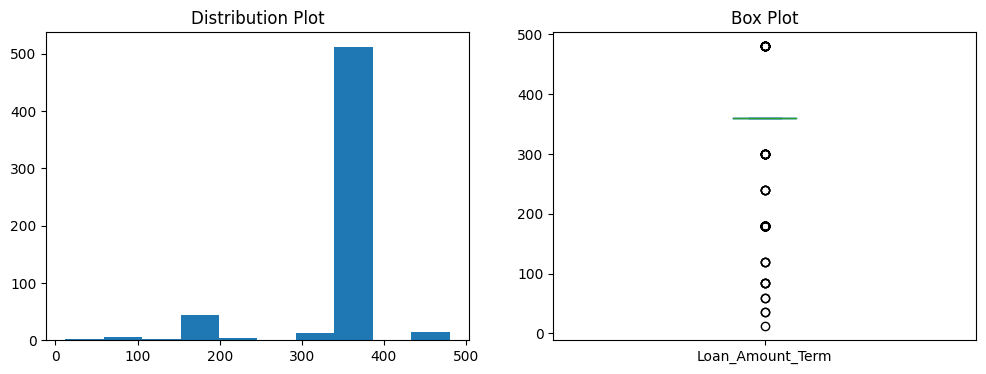

In [23]:
plot_dist_and_box('Loan_Amount_Term')

***Observations*** \
We can understand the following from the above plots:
* None of the variables are normally distributed. Applicant Income is right skewed.
* We can also see that there are outliers when it comes to Applicant Income, showing disparity.
* There are outliers in the Coapplicant Income as well.

## Bivariate Analysis

We can form some hypotheses:
1. Applicants with high income, should have higher chance of approval.
2. Appplicants who have repaid their previous debts should have higher chances of approval.
3. If the loan amount is less, the chances of approval should be higher.

We will test these hypotheses using bivariate analysis.

### Categorical Variables vs Target Variable

In [24]:
def plot_bivariate_stacked_bar(col):
    count = pd.crosstab(data[col], data['Loan_Status'])
    count.div(count.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, title=f'{col} v/s Loan Status', rot='horizontal')
    plt.show()

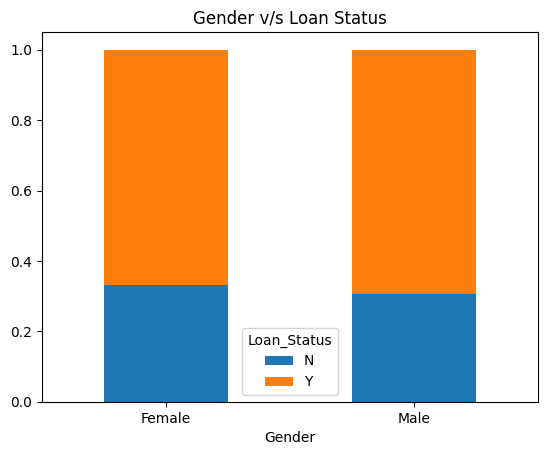

In [25]:
## Gender v/s Loan Status
plot_bivariate_stacked_bar('Gender')

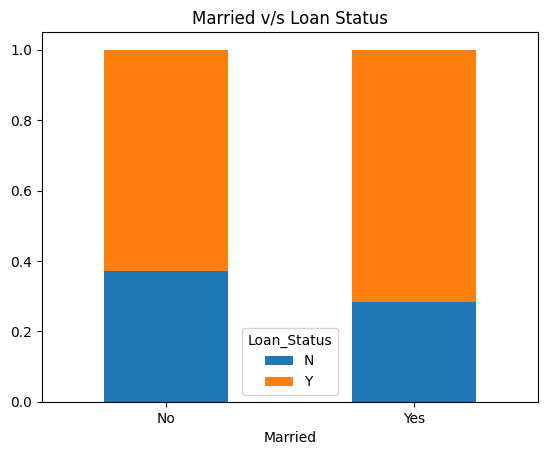

In [26]:
## Married v/s Loan Status
plot_bivariate_stacked_bar('Married')

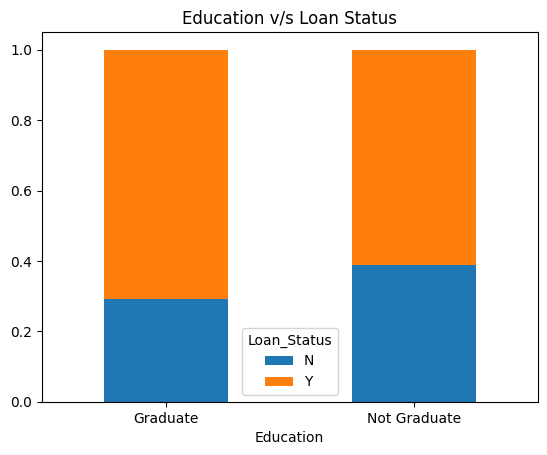

In [27]:
## Education v/s Loan Status
plot_bivariate_stacked_bar('Education')

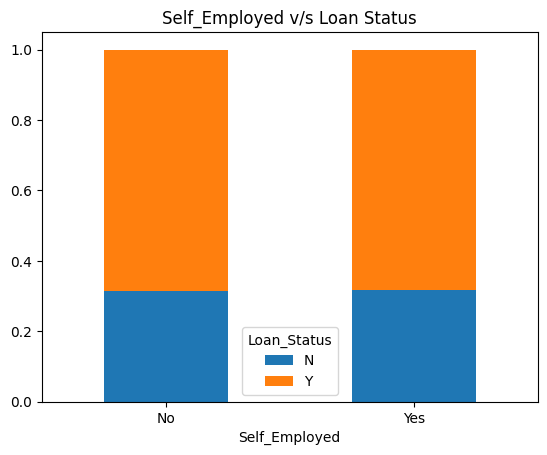

In [28]:
## Self Employed v/s Loan Status
plot_bivariate_stacked_bar('Self_Employed')

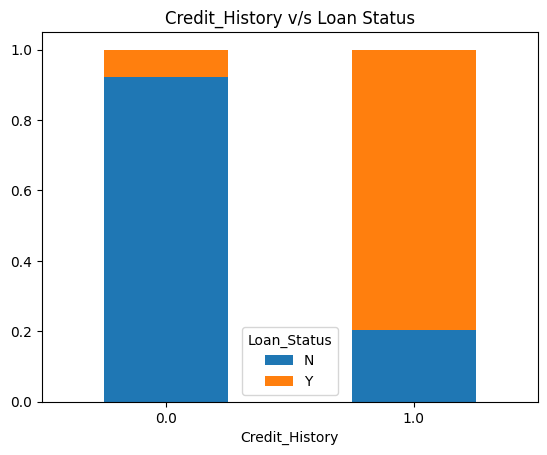

In [29]:
## Credit History v/s Loan Status
plot_bivariate_stacked_bar('Credit_History')

***Observations*** \
From the above plots we can understand:
* We can observe that the approval rate is almost same for both Genders.
* Approval rate is higher for married applicants.
* The proportion of graduate applicants is higher for approved loans.
* Applicants with previous credit history are much more likely to get approved for a loan.

### Ordinal Variables vs Target Variable

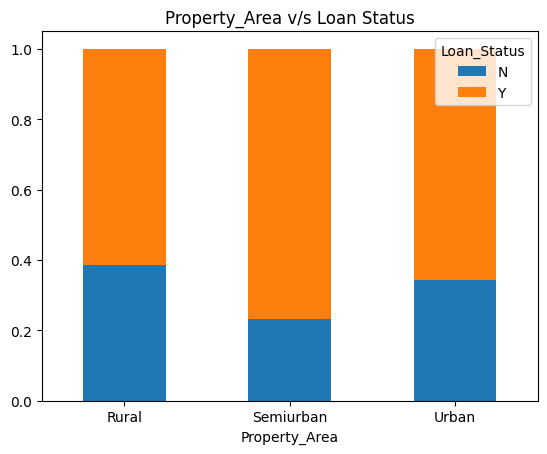

In [30]:
plot_bivariate_stacked_bar('Property_Area')

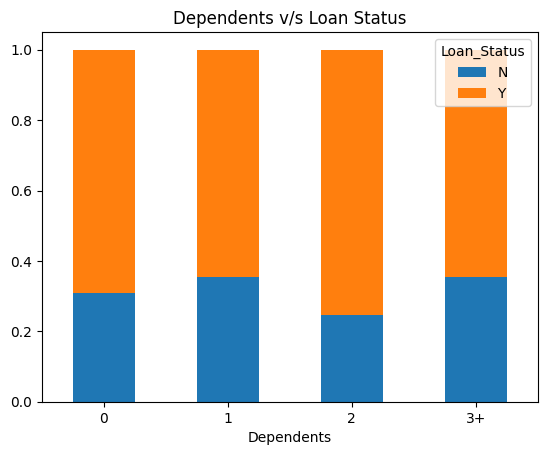

In [31]:
plot_bivariate_stacked_bar('Dependents')

***Observations*** \
From the above plots we can understand:
* Applicants living in Semiurban have a higher proportion of approved applicants than applicants living in Urban and Rural.
* Distribution of applicants with 1 or 3+ dependents is similar across categories of Loan Status while the proportion is higher for applicants with 2 dependents.

### Numerical Variables vs Target Variable

We will try to find the mean income of people for whom the loan has been approved and for those for whom it's not approved

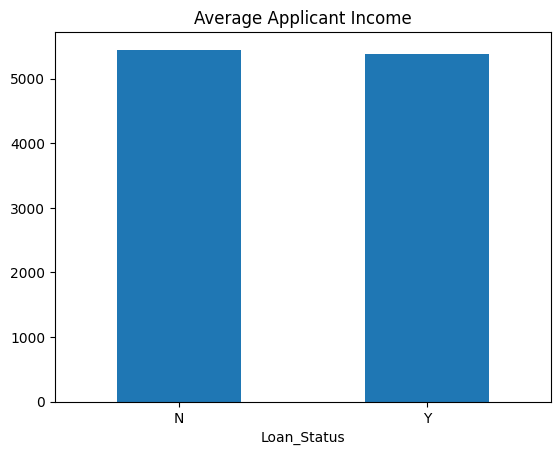

In [32]:
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(rot='horizontal', title='Average Applicant Income')
plt.show()

There is not much difference in the mean incomes.

In [33]:
## bucketing applicant incomes in 4 buckets - low, average, high, very high
data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

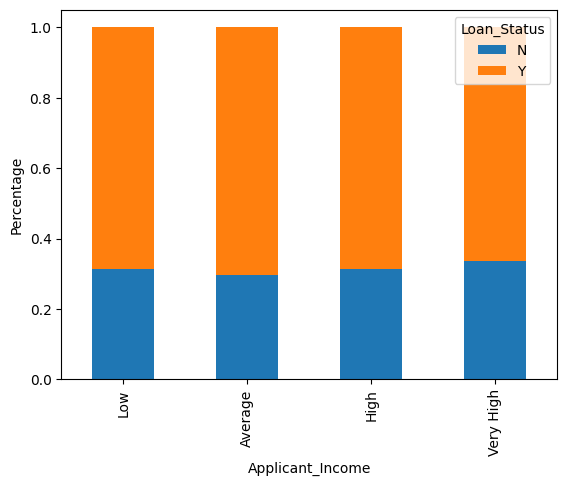

In [34]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
data['Income_Bin'] = pd.cut(data['ApplicantIncome'], bins, labels=group)
Income_bin = pd.crosstab(data['Income_Bin'], data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, xlabel='Applicant_Income', ylabel='Percentage')
plt.show()

We can observe that Applicant's income does not affect the chances of approval, which contradicts our hypothesis.

In [35]:
## bucketing co-applicant income in similar manner
data['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

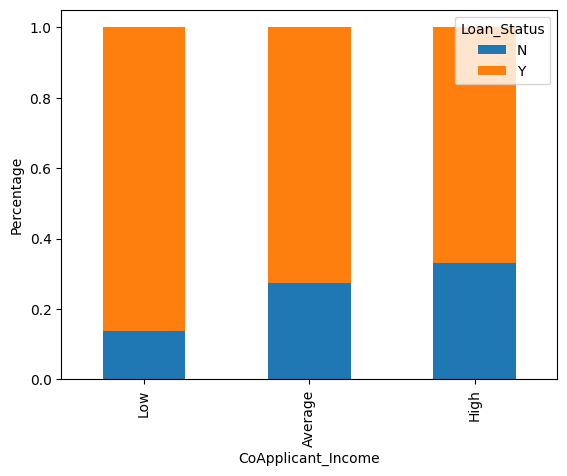

In [36]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
data['Coapplicant_Income_Bin'] = pd.cut(data['CoapplicantIncome'], bins, labels=group)
Coapplicant_Income_bin = pd.crosstab(data['Coapplicant_Income_Bin'], data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, xlabel='CoApplicant_Income', ylabel='Percentage')
plt.show()

We can observe from the above plot that, if the co-applicant income is low the chances of approval are high. But this seems counterintuitive. This maybe due to the fact that many applicants do not have a co-applicant and the co-applicant income is 0.

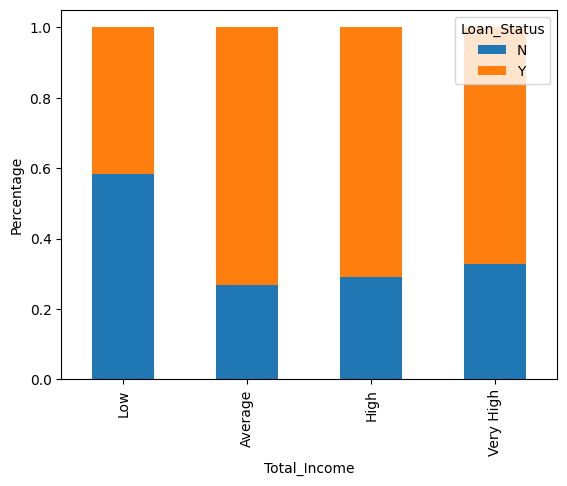

In [37]:
## Combining applicant and co-applicant incomes to analyse total incomes
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
data['Total_Income_Bin'] = pd.cut(data['TotalIncome'], bins, labels=group)
Total_Income_bin = pd.crosstab(data['Total_Income_Bin'], data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, xlabel='Total_Income', ylabel='Percentage')
plt.show()

We can observe from the above plot that approval rate for applications with low total income is lower compared to other buckets.

In [38]:
## Visualizing the loan amount
data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

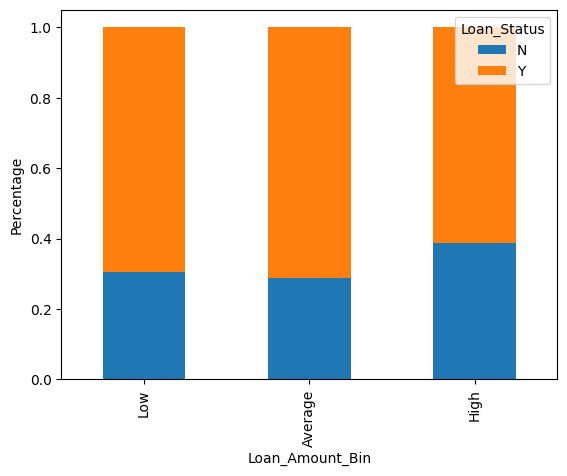

In [39]:
bins = [0, 100, 200, 700]
groups = ['Low', 'Average', 'High']
data['Loan_Amount_Bin'] = pd.cut(data['LoanAmount'], bins, labels=groups)
LoanAmount_bin = pd.crosstab(data['Loan_Amount_Bin'], data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot.bar(stacked=True, ylabel='Percentage')
plt.show()

We can observe from the above plot that chances of approval are higher for low and average loan amount is higher compared to high loan amount. This validates out hypothesis.

In [40]:
## Dropping unused columns and replacing 3+ in the dependents variable to 3. Also replacing N/Y in Loan_Status (y) to 0 or 1
data = data.drop(['Income_Bin', 'Coapplicant_Income_Bin', 'Total_Income_Bin', 'Loan_Amount_Bin', 'TotalIncome'], axis=1)
data['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
data['Loan_Status'].replace('N', 0, inplace=True)
data['Loan_Status'].replace('Y', 1, inplace=True)

### Observing Correlation Matrix

<AxesSubplot: >

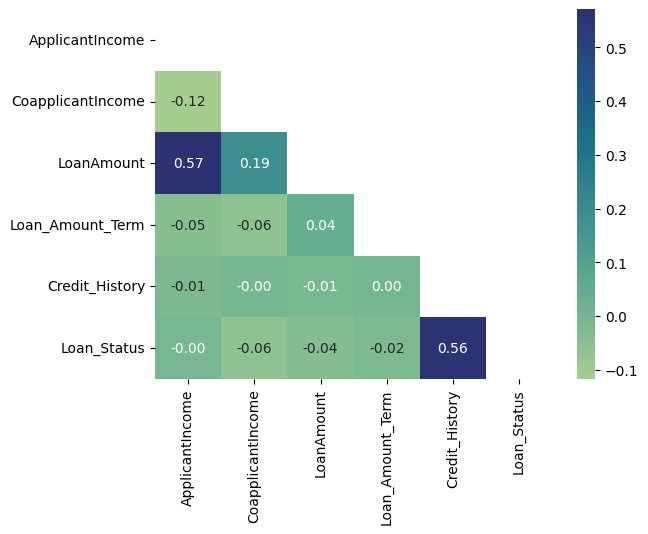

In [41]:
corr_mat = data.corr(numeric_only=True)
mask = np.triu(corr_mat)
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='crest', mask=mask)

***Observations*** \
We can observe from the above plot that (ApplicantIncome - LoanAmount) and (Loan_Status-Credit_History) are strongly correlated. We can also see that (LoanAmount-CoapplicantIncome) are also correlated.

In [42]:
data.to_csv('./data/eda_data.csv', index=False)
test.to_csv('./data/eda_test.csv', index=False)